# Sample Analysis
## A Guide to the National Structure Inventory (NSI) API in Python
Author: Mark Bauer

This project aims to demonstrate how to use the National Structure Inventory (NSI) API in Python. For more information about the NSI API, please visit the [API Reference Guide](https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide) and the [NSI Documentation](https://www.hec.usace.army.mil/confluence/nsi).

Additionally, I recommend familiarizing yourself with the [data dictionary](https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/technical-documentation) to better understand the dataset.

The goal of this notebook is to fetch data for Manhattan using the API, conduct exploratory data analysis, and examine the structure foundation height attribute.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

# National Structure Inventory (NSI) API

# Structures Endpoint
> The structures endpoint provides structure data to the user as a geojson feature collection (fc) or a feature stream (fs), the default is feature collection. The structure of a feature returned by the API can be seen in this geojson feature block. The type of return can be declared by the fmt directive (e.g. &fmt=fc)

Source: https://www.hec.usace.army.mil/confluence/nsi/technicalreferences/latest/api-reference-guide#id-.APIReferenceGuidev2022-Structures

## Structures By FIPS
FIPS codes: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

For the FIPS code argument, we will use Manhattan borough - **36061**.

In [2]:
# set variables
root_url = "https://nsi.sec.usace.army.mil/nsiapi/"
structures = "structures?fips="
fips = "36061"

# read url into a pandas DataFrame
url = f"{root_url}{structures}{fips}"
df = pd.read_json(url)

# sanity check
print(df.shape)
df.head()

(163033, 2)


,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Poin..."


In [3]:
# convert JSON into flat table
df = pd.json_normalize(df['features'])

# sanity check
print(df.shape)
df.head()

(163033, 32)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.val_vehic,properties.source,properties.med_yr_blt,properties.firmzone,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,135000,X,1939,None,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,27000,X,1939,None,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,36000,X,1975,None,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,54000,X,1939,None,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,234000,X,1959,None,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


In [4]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163033 entries, 0 to 163032
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     163033 non-null  object 
 1   geometry.type            163033 non-null  object 
 2   geometry.coordinates     163033 non-null  object 
 3   properties.fd_id         163033 non-null  int64  
 4   properties.bid           163033 non-null  object 
 5   properties.occtype       163033 non-null  object 
 6   properties.st_damcat     163033 non-null  object 
 7   properties.bldgtype      163033 non-null  object 
 8   properties.found_type    163033 non-null  object 
 9   properties.cbfips        163033 non-null  object 
 10  properties.pop2amu65     163033 non-null  int64  
 11  properties.pop2amo65     163033 non-null  int64  
 12  properties.pop2pmu65     163033 non-null  int64  
 13  properties.pop2pmo65     163033 non-null  int64  
 14  prop

In [5]:
# nulls per column
df.isnull().sum().sort_values(ascending=False)

properties.firmzone        163033
properties.ftprntsrc       113100
type                            0
geometry.type                   0
properties.ground_elv           0
properties.y                    0
properties.x                    0
properties.u65disable           0
properties.o65disable           0
properties.med_yr_blt           0
properties.source               0
properties.val_vehic            0
properties.val_cont             0
properties.val_struct           0
properties.found_ht             0
properties.students             0
properties.ftprntid             0
properties.num_story            0
properties.sqft                 0
properties.pop2pmo65            0
properties.pop2pmu65            0
properties.pop2amo65            0
properties.pop2amu65            0
properties.cbfips               0
properties.found_type           0
properties.bldgtype             0
properties.st_damcat            0
properties.occtype              0
properties.bid                  0
properties.fd_

In [6]:
# return boolean by column if all values are NULL
ser = df.isnull().all()

# select columns that are True (all NULL == True)
col = ser.loc[ser].index[0]

# locate only columns that are not in the above list
df = df.loc[:, ~df.columns.isin([col])]

print(df.shape)
df.head()

(163033, 31)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.val_cont,properties.val_vehic,properties.source,properties.med_yr_blt,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,374433.351,135000,X,1939,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,230627.308,27000,X,1939,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,1027723.520,36000,X,1975,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,409029.677,54000,X,1939,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,5813544.000,234000,X,1959,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


In [7]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163033 entries, 0 to 163032
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     163033 non-null  object 
 1   geometry.type            163033 non-null  object 
 2   geometry.coordinates     163033 non-null  object 
 3   properties.fd_id         163033 non-null  int64  
 4   properties.bid           163033 non-null  object 
 5   properties.occtype       163033 non-null  object 
 6   properties.st_damcat     163033 non-null  object 
 7   properties.bldgtype      163033 non-null  object 
 8   properties.found_type    163033 non-null  object 
 9   properties.cbfips        163033 non-null  object 
 10  properties.pop2amu65     163033 non-null  int64  
 11  properties.pop2amo65     163033 non-null  int64  
 12  properties.pop2pmu65     163033 non-null  int64  
 13  properties.pop2pmo65     163033 non-null  int64  
 14  prop

In [8]:
# summary statistics of numeric columns, transpose for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
properties.fd_id,163033.0,5.549201e+08,5.671348e+05,5.540769e+08,5.543870e+08,5.548442e+08,5.553810e+08,5.561127e+08
properties.pop2amu65,163033.0,8.408764e+00,3.439559e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.739000e+03
properties.pop2amo65,163033.0,1.994860e+00,9.684798e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.880000e+02
properties.pop2pmu65,163033.0,1.791810e+01,1.426797e+02,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.831200e+04
properties.pop2pmo65,163033.0,2.616617e+00,1.200393e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.096000e+03
properties.sqft,163033.0,5.226986e+03,1.756495e+04,1.467808e+01,8.000000e+02,1.343000e+03,3.004000e+03,1.655955e+06
properties.num_story,163033.0,2.221612e+00,8.957499e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.910000e+02
properties.students,163033.0,1.304061e+00,3.075278e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.288000e+03
properties.found_ht,163033.0,1.696101e+00,1.768494e+00,5.000000e-01,5.000000e-01,1.500000e+00,2.000000e+00,8.000000e+00
properties.val_struct,163033.0,1.127928e+06,3.421964e+06,0.000000e+00,2.220645e+05,3.165476e+05,6.430523e+05,3.502432e+08


# Scan and Preview Every 10 Columns
It's hard to preview values for wide datasets (i.e. datasets with a large number of columns). This is a quick way to scan and preview each column.

In [9]:
df.iloc[:5, :10]

,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000


In [10]:
df.iloc[:5, 10:20]

,properties.pop2amu65,properties.pop2amo65,properties.pop2pmu65,properties.pop2pmo65,properties.sqft,properties.num_story,properties.ftprntid,properties.ftprntsrc,properties.students,properties.found_ht
0,78,25,45,25,3000.000,1,36061_2107,MBL,0,0.5
1,88,24,43,24,1813.608,2,36061_2142,MBL,0,0.5
2,1,0,6,1,10000.000,1,36061_4177,MBL,0,0.5
3,87,16,34,16,3301.125,1,36061_7823,MBL,0,0.5
4,2,0,40,1,29057.000,1,36061_13703,MBL,0,0.5


In [11]:
df.iloc[:5, 20:]

,properties.val_struct,properties.val_cont,properties.val_vehic,properties.source,properties.med_yr_blt,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m
0,748866.702,374433.351,135000,X,1939,0.25,0.03,-73.998410,40.714656,30.833406,9.398022
1,461254.616,230627.308,27000,X,1939,0.25,0.03,-73.997441,40.714627,36.259209,11.051806
2,1027723.520,1027723.520,36000,X,1975,0.25,0.03,-74.011070,40.719515,9.820276,2.993220
3,818059.354,409029.677,54000,X,1939,0.25,0.03,-73.997247,40.721022,32.165671,9.804096
4,5813544.000,5813544.000,234000,X,1959,0.25,0.03,-73.984015,40.718307,23.983126,7.310057


# Map Codes to Names
Map codes/acronyms to full names for readability.

In [12]:
# map building type codes to names
bldgtype_names = {
    "M":"Masonry",
    "W":"Wood",
    "H":"Manufactured",
    "S":"Steel",
    "C":"Concrete"
}

# sanity check
bldgtype_names

{'M': 'Masonry',
 'W': 'Wood',
 'H': 'Manufactured',
 'S': 'Steel',
 'C': 'Concrete'}

In [13]:
# map building type codes to names
df['properties.bldgtype_names'] = df['properties.bldgtype'].replace(bldgtype_names)

# sanity check
(df
 .groupby(
     by=['properties.bldgtype', 'properties.bldgtype_names'])['properties.fd_id']
 .count()
)

properties.bldgtype  properties.bldgtype_names
C                    Concrete                     54053
H                    Manufactured                     6
M                    Masonry                      22012
S                    Steel                        28392
W                    Wood                         58570
Name: properties.fd_id, dtype: int64

In [14]:
# map foundation type codes to names
found_type_names = {
    "C":"Crawl",
    "B":"Basement",
    "S":"Slab",
    "P":"Pier",
    "I":"Pile",
    "F":"Fill",
    "W":"Solid Wall"
}

# sanity check
found_type_names

{'C': 'Crawl',
 'B': 'Basement',
 'S': 'Slab',
 'P': 'Pier',
 'I': 'Pile',
 'F': 'Fill',
 'W': 'Solid Wall'}

In [15]:
# map foundation type codes to names
df['properties.found_type_names'] = df['properties.found_type'].replace(found_type_names)

# sanity check
(df
 .groupby(
     by=['properties.found_type', 'properties.found_type_names'])['properties.fd_id']
 .count()
)

properties.found_type  properties.found_type_names
B                      Basement                       80023
C                      Crawl                          16659
I                      Pile                            8429
P                      Pier                            1745
S                      Slab                           55515
W                      Solid Wall                       662
Name: properties.fd_id, dtype: int64

# Examine Spatially
Good to groundtruth locations on a map.

In [16]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['properties.x'], df['properties.y']),
    crs="4326"
)

print(gdf.crs)
gdf.head()

epsg:4326


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.med_yr_blt,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m,properties.bldgtype_names,properties.found_type_names,geometry
0,Feature,Point,"[-73.99841, 40.714656]",554079197,87G8P272+VJ8-1-1-2-1,RES3C,RES,W,B,360610029003003,...,1939,0.25,0.03,-73.998410,40.714656,30.833406,9.398022,Wood,Basement,POINT (-73.99841 40.71466)
1,Feature,Point,"[-73.997441, 40.714627]",554079269,87G8P273+V23-2-5-3-4,RES3A,RES,M,S,360610029003004,...,1939,0.25,0.03,-73.997441,40.714627,36.259209,11.051806,Masonry,Slab,POINT (-73.99744 40.71463)
2,Feature,Point,"[-74.01107, 40.719515]",554096858,87G7PX9Q+RH3-1-1-1-1,IND6,IND,S,S,360610039002001,...,1975,0.25,0.03,-74.011070,40.719515,9.820276,2.993220,Steel,Slab,POINT (-74.01107 40.71952)
3,Feature,Point,"[-73.997247, 40.721022]",554126006,87G8P2C3+C42-8-6-8-7,RES3A,RES,W,S,360610041006002,...,1939,0.25,0.03,-73.997247,40.721022,32.165671,9.804096,Wood,Slab,POINT (-73.99725 40.72102)
4,Feature,Point,"[-73.984015, 40.718307]",554175328,87G8P298+89H-10-11-11-11,EDU1,PUB,S,S,360610014022000,...,1959,0.25,0.03,-73.984015,40.718307,23.983126,7.310057,Steel,Slab,POINT (-73.98401 40.71831)


<AxesSubplot: >

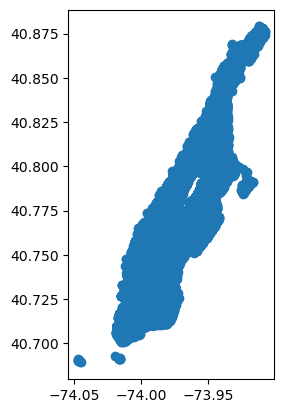

In [17]:
# sanity check of point locations
gdf.plot()

# Examine Counts for Categorical Columns

In [18]:
df['properties.source'].value_counts()

P    148355
E     11773
X      2348
S       499
N        30
H        28
Name: properties.source, dtype: int64

In [19]:
df['properties.ftprntsrc'].value_counts()

MBL     48460
NGA      1030
Bing      274
ORNL      169
Name: properties.ftprntsrc, dtype: int64

In [20]:
df['properties.bldgtype_names'].value_counts()

Wood            58570
Concrete        54053
Steel           28392
Masonry         22012
Manufactured        6
Name: properties.bldgtype_names, dtype: int64

In [21]:
df['properties.occtype'].value_counts().head(20)

RES1-1SWB    41416
RES1-1SNB    21765
RES1-2SWB    16621
COM1         11131
RES1-2SNB     9072
COM4          8129
RES1-3SWB     6620
IND2          5071
RES3E         5069
RES4          4564
RES3D         4042
RES1-3SNB     3958
RES3B         3656
RES3A         3234
RES3C         3144
RES3F         2764
COM8          2113
COM3          2067
REL1          1655
COM2          1101
Name: properties.occtype, dtype: int64

In [22]:
df['properties.st_damcat'].value_counts()

RES    121365
COM     32294
IND      6048
PUB      3326
Name: properties.st_damcat, dtype: int64

In [23]:
df['properties.found_type'].value_counts()

B    80023
S    55515
C    16659
I     8429
P     1745
W      662
Name: properties.found_type, dtype: int64

In [24]:
df['properties.found_type_names'].value_counts()

Basement      80023
Slab          55515
Crawl         16659
Pile           8429
Pier           1745
Solid Wall      662
Name: properties.found_type_names, dtype: int64

In [25]:
# counts grouped by foundation type and foundation height
(df
 .groupby(by=['properties.found_type_names', 'properties.found_ht'])['properties.fd_id']
 .count()
)

properties.found_type_names  properties.found_ht
Basement                     0.5                    10488
                             2.0                    69535
Crawl                        0.5                     2804
                             1.5                    13855
Pier                         8.0                     1745
Pile                         8.0                     8429
Slab                         0.5                    55514
                             2.0                        1
Solid Wall                   0.5                      122
                             1.5                      540
Name: properties.fd_id, dtype: int64

In [26]:
# counts grouped by building type and height
(df
 .groupby(by=['properties.bldgtype_names', 'properties.found_ht'])['properties.fd_id']
 .count()
)

properties.bldgtype_names  properties.found_ht
Concrete                   0.5                    11624
                           1.5                     6688
                           2.0                    31751
                           8.0                     3990
Manufactured               2.0                        6
Masonry                    0.5                    13703
                           1.5                     1192
                           2.0                     5914
                           8.0                     1203
Steel                      0.5                    24792
                           1.5                      390
                           2.0                     1899
                           8.0                     1311
Wood                       0.5                    18809
                           1.5                     6125
                           2.0                    29966
                           8.0                     3670
N

In [27]:
# counts grouped by building type, foundation type and foundation height
(df
 .groupby(by=[
     'properties.bldgtype_names',
     'properties.found_type_names',
     'properties.found_ht'])
 ['properties.fd_id']
 .count()
)

properties.bldgtype_names  properties.found_type_names  properties.found_ht
Concrete                   Basement                     0.5                      231
                                                        2.0                    31751
                           Crawl                        0.5                      168
                                                        1.5                     6432
                           Pier                         8.0                      711
                           Pile                         8.0                     3279
                           Slab                         0.5                    11207
                           Solid Wall                   0.5                       18
                                                        1.5                      256
Manufactured               Basement                     2.0                        5
                           Slab                         2.0               

# Analyze Foundation Height

## Examine Distribution and Counts of Foundation Height

<AxesSubplot: xlabel='properties.found_ht', ylabel='Count'>

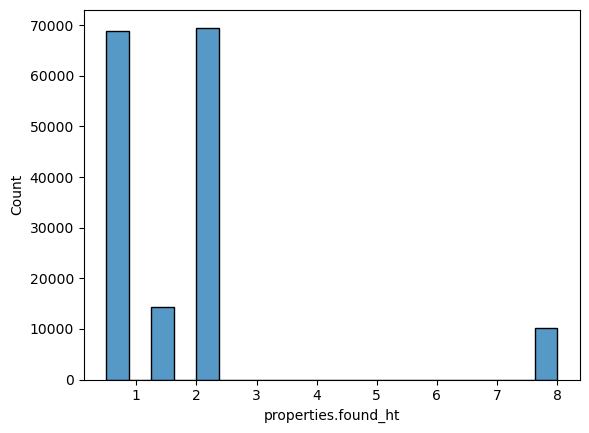

In [28]:
sns.histplot(
    df['properties.found_ht'],
    bins=20
)

In [29]:
# count per height
df['properties.found_ht'].value_counts()

2.0    69536
0.5    68928
1.5    14395
8.0    10174
Name: properties.found_ht, dtype: int64

<AxesSubplot: xlabel='properties.found_ht', ylabel='count'>

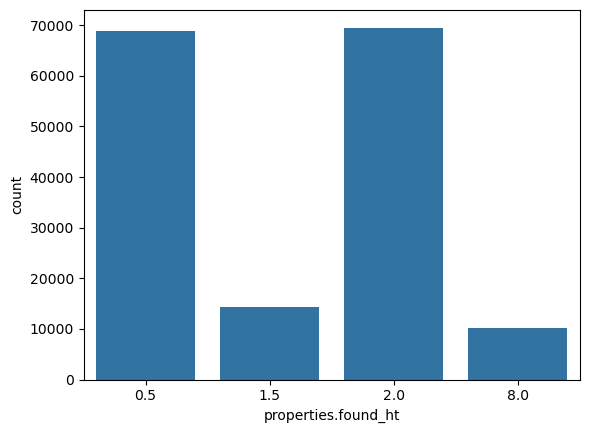

In [30]:
# bar plot and not a histogram
sns.countplot(
    data=df,
    x='properties.found_ht',
    color="C0"
)

<AxesSubplot: ylabel='properties.found_ht'>

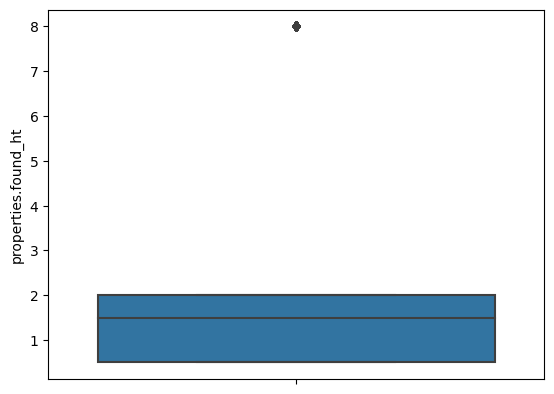

In [31]:
sns.boxplot(
    data=df,
    y='properties.found_ht'
)

## Visualize Foundation Height by Census Block

In [32]:
# calculate summary statistics of foundation height by census block
cb_foundation_height = (
    df
    .groupby(by='properties.cbfips')['properties.found_ht']
    .describe()
    .reset_index()
)

cb_foundation_height.head()

,properties.cbfips,count,mean,std,min,25%,50%,75%,max
0,360610001001001,9.0,2.166667,3.307189,0.5,0.5,0.5,0.500,8.0
1,360610002011000,38.0,0.539474,0.243332,0.5,0.5,0.5,0.500,2.0
2,360610002011001,3.0,0.500000,0.000000,0.5,0.5,0.5,0.500,0.5
3,360610002012000,6.0,0.500000,0.000000,0.5,0.5,0.5,0.500,0.5
4,360610002012001,6.0,1.166667,0.752773,0.5,0.5,1.0,1.875,2.0


In [33]:
# retrieve census block GeoJSON
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Blocks_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
cb_gdf = gpd.read_file(path)

print(cb_gdf.crs)
cb_gdf.head()

epsg:4326


,OBJECTID,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,Shape__Area,Shape__Length,geometry
0,1,1000,1,Manhattan,000100,10001001000,360610001001000,1.202838e+06,6437.853745,"POLYGON ((-74.03995 40.70090, -74.03945 40.700..."
1,2,1001,1,Manhattan,000100,10001001001,360610001001001,6.401664e+05,4395.190183,"POLYGON ((-74.04388 40.69020, -74.04351 40.689..."
2,3,1000,1,Manhattan,000201,10002011000,360610002011000,1.292763e+05,1569.384823,"POLYGON ((-73.98512 40.71380, -73.98706 40.713..."
3,4,1001,1,Manhattan,000201,10002011001,360610002011001,1.393604e+05,1594.262855,"POLYGON ((-73.98506 40.71309, -73.98545 40.713..."
4,5,2000,1,Manhattan,000201,10002012000,360610002012000,2.633084e+05,2055.295961,"POLYGON ((-73.98495 40.71236, -73.98485 40.711..."


In [34]:
# only examining Manhattan
cb_gdf = cb_gdf.loc[cb_gdf['BoroName'] == 'Manhattan']

print(cb_gdf.shape)
cb_gdf.head()

(3281, 10)


,OBJECTID,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,Shape__Area,Shape__Length,geometry
0,1,1000,1,Manhattan,000100,10001001000,360610001001000,1.202838e+06,6437.853745,"POLYGON ((-74.03995 40.70090, -74.03945 40.700..."
1,2,1001,1,Manhattan,000100,10001001001,360610001001001,6.401664e+05,4395.190183,"POLYGON ((-74.04388 40.69020, -74.04351 40.689..."
2,3,1000,1,Manhattan,000201,10002011000,360610002011000,1.292763e+05,1569.384823,"POLYGON ((-73.98512 40.71380, -73.98706 40.713..."
3,4,1001,1,Manhattan,000201,10002011001,360610002011001,1.393604e+05,1594.262855,"POLYGON ((-73.98506 40.71309, -73.98545 40.713..."
4,5,2000,1,Manhattan,000201,10002012000,360610002012000,2.633084e+05,2055.295961,"POLYGON ((-73.98495 40.71236, -73.98485 40.711..."


In [35]:
# join foundation height summary stats against GeoJSON
cb_merged_gdf = cb_gdf.merge(
    cb_foundation_height,
    left_on='GEOID',
    right_on='properties.cbfips',
    how='left'
)

cb_merged_gdf.head()

,OBJECTID,CB2020,BoroCode,BoroName,CT2020,BCTCB2020,GEOID,Shape__Area,Shape__Length,geometry,properties.cbfips,count,mean,std,min,25%,50%,75%,max
0,1,1000,1,Manhattan,000100,10001001000,360610001001000,1.202838e+06,6437.853745,"POLYGON ((-74.03995 40.70090, -74.03945 40.700...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1001,1,Manhattan,000100,10001001001,360610001001001,6.401664e+05,4395.190183,"POLYGON ((-74.04388 40.69020, -74.04351 40.689...",360610001001001,9.0,2.166667,3.307189,0.5,0.5,0.5,0.5,8.0
2,3,1000,1,Manhattan,000201,10002011000,360610002011000,1.292763e+05,1569.384823,"POLYGON ((-73.98512 40.71380, -73.98706 40.713...",360610002011000,38.0,0.539474,0.243332,0.5,0.5,0.5,0.5,2.0
3,4,1001,1,Manhattan,000201,10002011001,360610002011001,1.393604e+05,1594.262855,"POLYGON ((-73.98506 40.71309, -73.98545 40.713...",360610002011001,3.0,0.500000,0.000000,0.5,0.5,0.5,0.5,0.5
4,5,2000,1,Manhattan,000201,10002012000,360610002012000,2.633084e+05,2055.295961,"POLYGON ((-73.98495 40.71236, -73.98485 40.711...",360610002012000,6.0,0.500000,0.000000,0.5,0.5,0.5,0.5,0.5


In [36]:
# percent null for all census blocks
cb_merged_gdf['properties.cbfips'].isnull().sum() / cb_gdf.shape[0] * 100

31.057604388905823

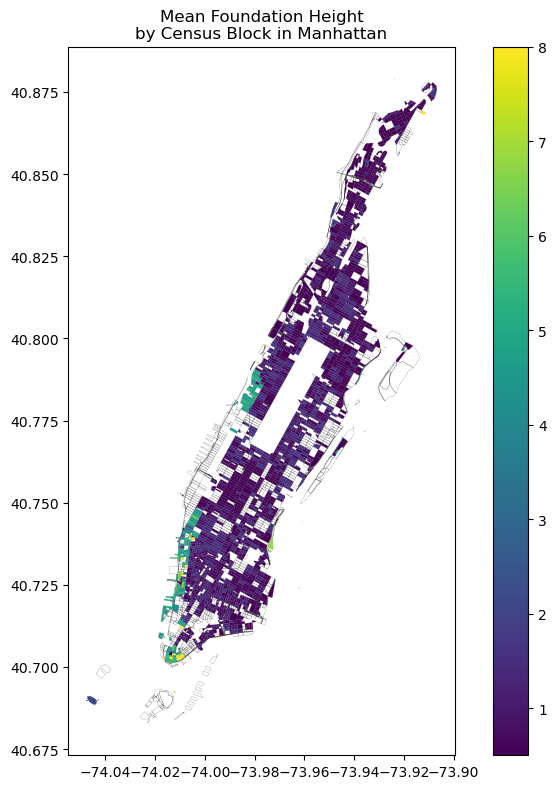

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

cb_merged_gdf.plot(
    column='mean',
    legend=True,
    ax=ax
)

cb_gdf.plot(
    ax=ax,
    facecolor='None',
    linewidth=.1,
    zorder=0
)

plt.title("Mean Foundation Height\nby Census Block in Manhattan")
plt.tight_layout()

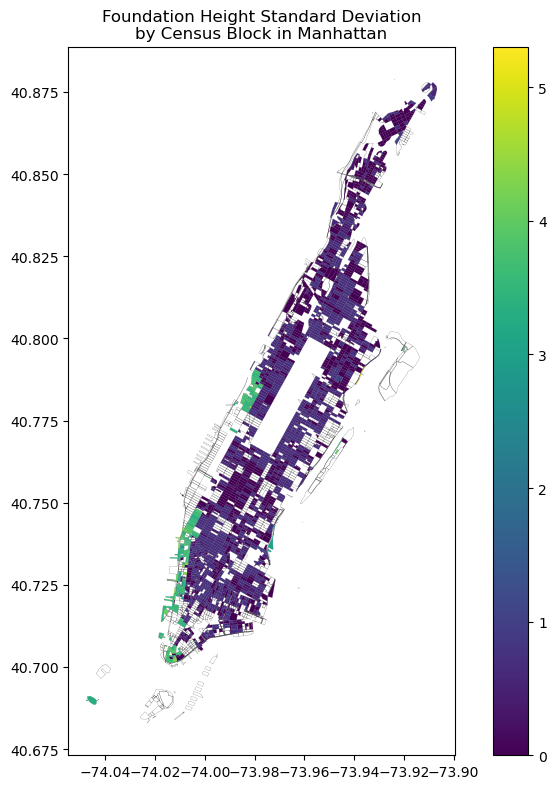

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))

cb_merged_gdf.plot(
    column='std',
    legend=True,
    ax=ax
)

cb_gdf.plot(
    ax=ax,
    facecolor='None',
    linewidth=.1,
    zorder=0
)

plt.title("Foundation Height Standard Deviation\nby Census Block in Manhattan")
plt.tight_layout()

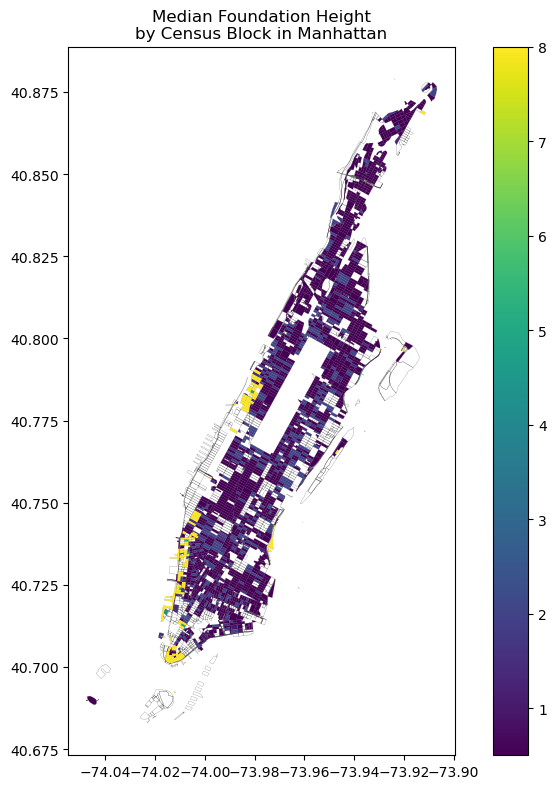

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

cb_merged_gdf.plot(
    column='50%',
    legend=True,
    ax=ax
)

cb_gdf.plot(
    ax=ax,
    facecolor='None',
    linewidth=.1,
    zorder=0
)

plt.title("Median Foundation Height\nby Census Block in Manhattan")
plt.tight_layout()

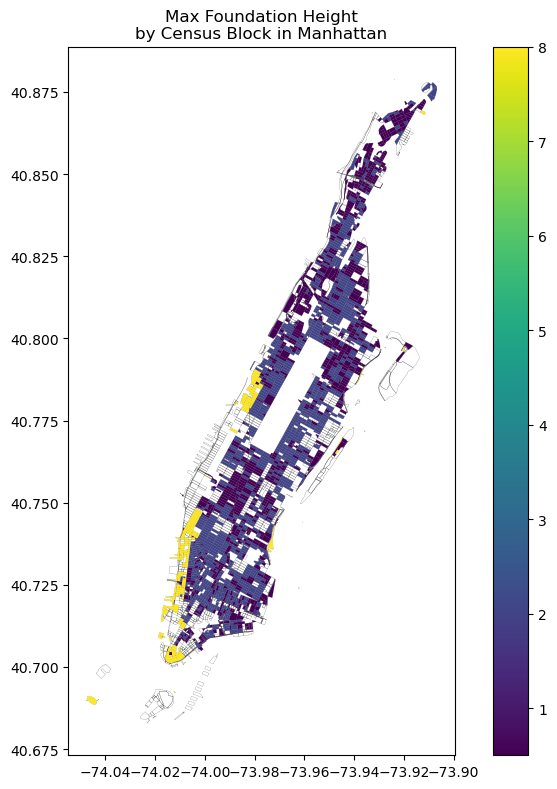

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))

cb_merged_gdf.plot(
    column='max',
    legend=True,
    ax=ax
)

cb_gdf.plot(
    ax=ax,
    facecolor='None',
    linewidth=.1,
    zorder=0
)

plt.title("Max Foundation Height\nby Census Block in Manhattan")
plt.tight_layout()

## Examine the Relationship of Attributes on Foundation Height

### Correlation Matrix

We'll start off by computing the pairwise correlation of columns. Note: The default method is `pearson:standard correlation coefficient`.

Also important to note that our foundation height variable not only includes national defaults but suffers from low cardinality (e.g. there are only four possible values). Using and interpreting Person's correlation coefficient with this dataset may not be appropriate.

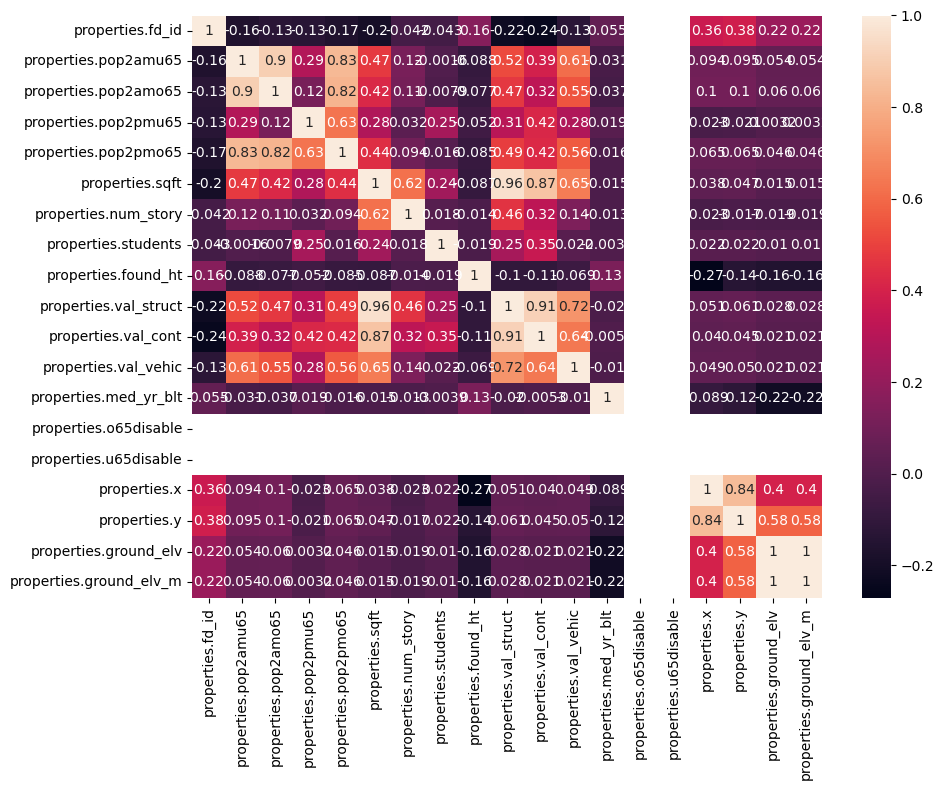

In [41]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

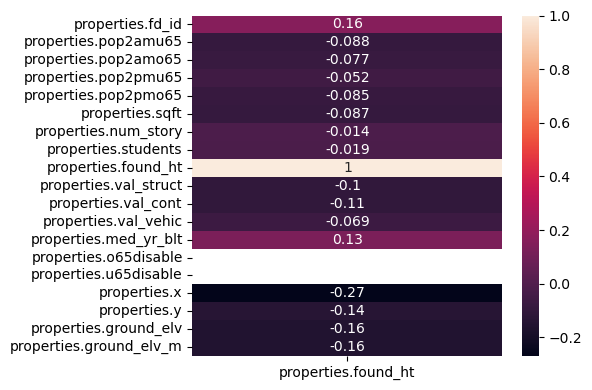

In [42]:
# correlation of the foundation height attribute against all other columns
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    df.corr(numeric_only=True).loc[:, ['properties.found_ht']], 
    annot=True, 
    ax=ax
)

plt.tight_layout()

Note: Blanks in the correlation matrix suggests that there is only one value in those columns or the data is all NULL. In this case, those values are county statistics, and given that this is a single county, there is only a single value.

### Distribution of Foundation Heights by Various Categories

We'd like to analyze the distribution of foundation height values across different foundation types. Although these two attributes are highly correlated, as illustrated by the box plot below, there are notable outliers that indicate they are not perfectly correlated.

<AxesSubplot: xlabel='properties.found_type_names', ylabel='properties.found_ht'>

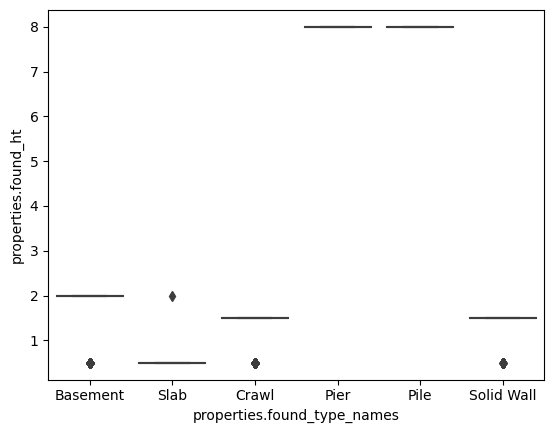

In [43]:
sns.boxplot(
    data=df,
    x="properties.found_type_names",
    y="properties.found_ht"
)

<AxesSubplot: xlabel='properties.bldgtype_names', ylabel='properties.found_ht'>

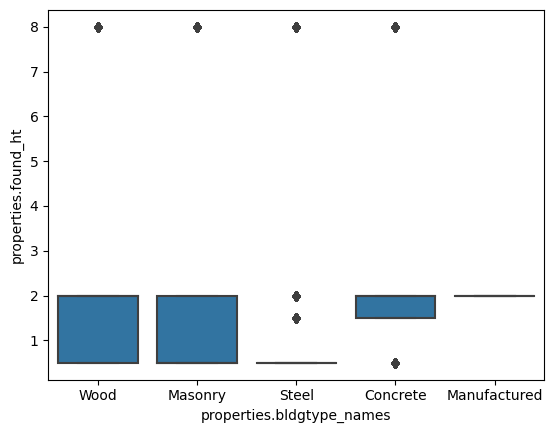

In [44]:
sns.boxplot(
    data=df,
    x="properties.bldgtype_names",
    y="properties.found_ht",
    color="C0"
)

There is greater variation in foundation heights among different building types, particularly with Wood and Masonry. However, it’s challenging to grasp the full range of possible values from the current data.

## Relationship of Numeric Attributes on Foundation Heights
We'll treat foundation heights as a categorical value, and examine the spread of data against other numeric values (e.g. year built, ground elevation, etc.).

<AxesSubplot: xlabel='properties.found_ht', ylabel='properties.med_yr_blt'>

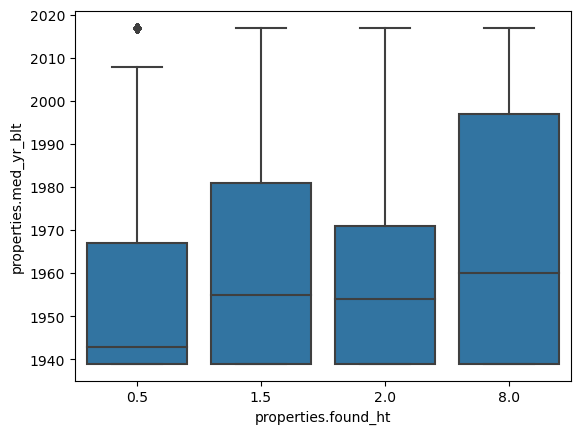

In [45]:
sns.boxplot(
    data=df,
    x="properties.found_ht",
    y="properties.med_yr_blt",
    color="C0"
)

<AxesSubplot: xlabel='properties.found_ht', ylabel='properties.ground_elv'>

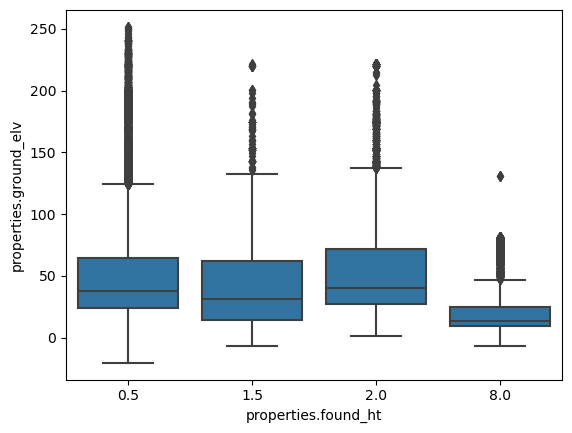

In [46]:
sns.boxplot(
    data=df,
    x="properties.found_ht",
    y="properties.ground_elv",
    color="C0"
)

<AxesSubplot: xlabel='properties.found_ht', ylabel='properties.sqft'>

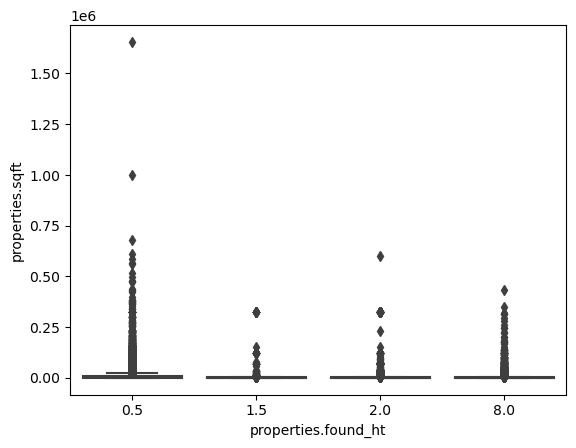

In [47]:
sns.boxplot(
    data=df,
    x="properties.found_ht",
    y="properties.sqft",
    color="C0"
)

<AxesSubplot: xlabel='properties.found_ht', ylabel='properties.num_story'>

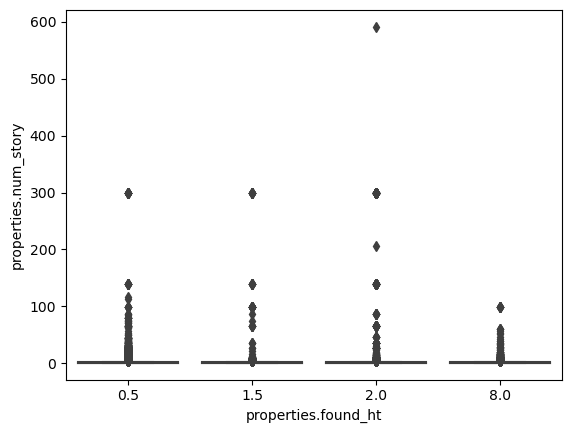

In [48]:
sns.boxplot(
    data=df,
    x="properties.found_ht",
    y="properties.num_story",
    color="C0"
)

<AxesSubplot: xlabel='properties.found_ht', ylabel='properties.val_struct'>

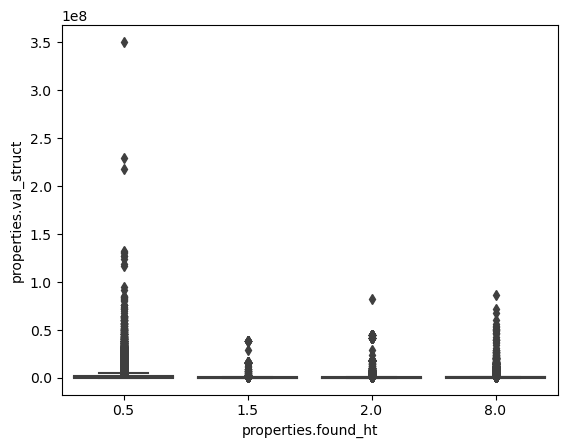

In [49]:
sns.boxplot(
    data=df,
    x="properties.found_ht",
    y="properties.val_struct",
    color="C0"
)

## Examine Foundation Height of 8ft.

In [50]:
foundation_height_eight = (
    df
    .loc[df['properties.found_ht'] == 8]
    .reset_index(drop=True)
)

print(foundation_height_eight.shape)
foundation_height_eight.head()

(10174, 34)


,type,geometry.type,geometry.coordinates,properties.fd_id,properties.bid,properties.occtype,properties.st_damcat,properties.bldgtype,properties.found_type,properties.cbfips,...,properties.med_yr_blt,properties.o65disable,properties.u65disable,properties.x,properties.y,properties.ground_elv,properties.ground_elv_m,properties.bldgtype_names,properties.found_type_names,geometry
0,Feature,Point,"[-74.004758, 40.740126]",554780497,87G7PXRW+335-0-0-0-0,RES1-3SNB,RES,S,P,360610077003000,...,1939,0.25,0.03,-74.004758,40.740126,9.039376,2.755202,Steel,Pier,POINT (-74.00476 40.74013)
1,Feature,Point,"[-73.97857, 40.784723]",555440628,87G8Q2MC+VHM-0-0-0-0,RES1-1SNB,RES,W,I,360610167004001,...,1939,0.25,0.03,-73.978570,40.784723,68.460883,20.866877,Wood,Pile,POINT (-73.97857 40.78472)
2,Feature,Point,"[-74.016054, 40.714126]",554077619,87G7PX7M+MH4-14-21-15-16,RES3A,RES,M,P,360610317031001,...,2017,0.25,0.03,-74.016054,40.714126,12.385327,3.775048,Masonry,Pier,POINT (-74.01605 40.71413)
3,Feature,Point,"[-74.015918, 40.713746]",554077612,87G7PX7M+FJW-2-3-2-1,RES3A,RES,W,I,360610317031001,...,2017,0.25,0.03,-74.015918,40.713746,13.660159,4.163616,Wood,Pile,POINT (-74.01592 40.71375)
4,Feature,Point,"[-74.016171, 40.713845]",554077614,87G7PX7M+GGP-5-7-4-7,RES3A,RES,W,I,360610317031001,...,2017,0.25,0.03,-74.016171,40.713845,13.840390,4.218551,Wood,Pile,POINT (-74.01617 40.71384)


<AxesSubplot: xlabel='properties.found_type_names', ylabel='count'>

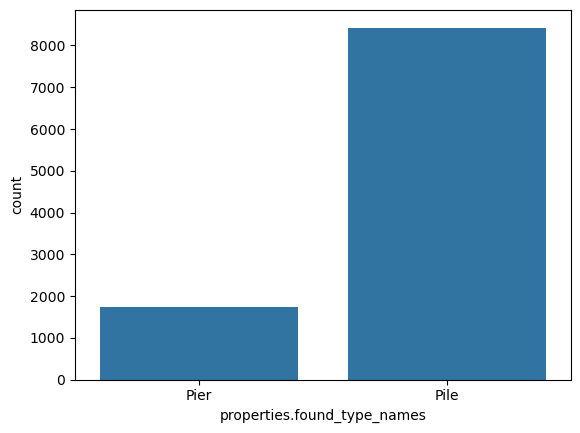

In [51]:
sns.countplot(
    data=foundation_height_eight,
    x="properties.found_type_names",
    color="C0"
)

<AxesSubplot: xlabel='properties.bldgtype_names', ylabel='count'>

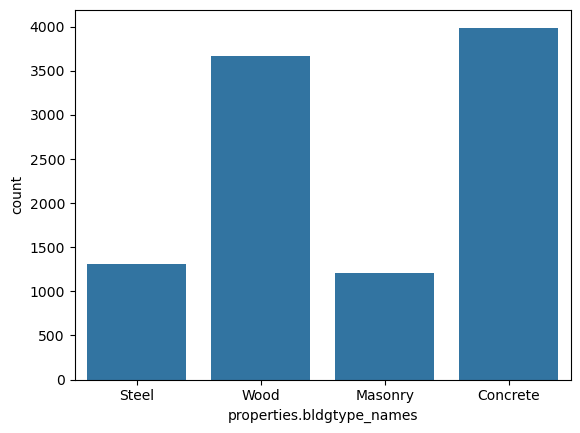

In [52]:
sns.countplot(
    data=foundation_height_eight,
    x="properties.bldgtype_names",
    color="C0"
)